# Data Analysis with Tesla stock

## Introduction

This project imports financial data of Tesla stock (TSLA), elaborates and visualize them and record the results on an external file.
<br>The project mainly uses:
- Pandas for store and manipulate data into DataFrames,
- Matplotlib for visualizing data into plots,
<br>Additional external resources used are:
- Numpy for generating arrays,
- Math for using mathematical operations,
- Os for manipulating directories.

The file containing financial data is named "TSLA.csv" and it is a .csv file with 2393 rows (2392 entries + 1 row for headers) and 7 columns. It contains 10 years of TSLA stock financial data.
<br>Columns are:

<b>Date</b>: The date of the trading day in yyyy-mm-day.
<br><b>Open</b>: The opening price, i.e. how much the stock was trading for at the beginning of the trading day.
<br><b>High</b>: The highest price for the stock reached during the trading day.
<br><b>Low</b>: The lowest price for the stock reached during the trading day.
<br><b>Close</b>: The closing price, i.e. how much the stock was trading for at the end of the trading day.
<br><b>Adj Close</b>: The adjusted closing price, i.e. the closing price updated with additional information such as dividend payouts and stock splits. You can see it as a more accurate representation of the closing price.
<br><b>Volume</b>: The trading volume for the trading day, i.e. how many shares are traded each day.

## Request 1
- Import the first 700 rows of TSLA.csv file into a DataFrame and display it.
- Produce a summary of the main statistics and print the number of rows and columns. (<code>df.shape[0]</code> e <code>df.shape[1]</code>)
- Check for NaNs and eventually drop the entire row.
- Check if for all rows the following statements are true:

  1. The High value is greater than or equal to both the Open and the Close values.
  2. The Low value is less than or equal to both the Open and the Close values.
  3. The Adj Close values is less than or equal to the Close value.


- Plot the Open, High, Low, Close and Adj Close on the same plot.

In [419]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [420]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [421]:
df = pd.read_csv('/content/drive/MyDrive/TSLA.csv', nrows=700)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
...,...,...,...,...,...,...,...
695,2013-04-08,8.394,8.510,8.302,8.366,8.366,8395000
696,2013-04-09,8.360,8.366,8.066,8.100,8.100,8480500
697,2013-04-10,8.140,8.402,8.122,8.372,8.372,10605500
698,2013-04-11,8.412,8.910,8.350,8.718,8.718,17237000


In [422]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [423]:
df['Date'] = pd.to_datetime(df['Date'])

In [424]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,700,700.000000,700.000000,700.000000,700.000000,700.000000,7.000000e+02
mean,2011-11-19 12:12:20.571428608,5.763329,5.882563,5.631946,5.756494,5.756494,6.762715e+06
min,2010-07-01 00:00:00,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,2011-03-10 18:00:00,5.026000,5.159000,4.870500,5.010500,5.010500,3.627000e+06
50%,2011-11-16 12:00:00,5.716000,5.851000,5.609000,5.713000,5.713000,5.111500e+06
75%,2012-07-30 06:00:00,6.500000,6.651500,6.363500,6.509000,6.509000,7.648750e+06
max,2013-04-12 00:00:00,8.720000,9.336000,8.702000,8.868000,8.868000,7.049250e+07
std,NaN,1.033074,1.053309,1.031371,1.045342,1.045342,6.224263e+06


In [425]:
df.shape

(700, 7)

In [426]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [427]:
comparison_High = (df['High'] >= df['Open']) & (df['High'] >= df['Close'])
comparison_High.count()

700

In [428]:
Less_comparison = (df['Low'] <= df['Open']) & (df['Low'] <= df['Close'])
Less_comparison.count()

700

In [429]:
comparison = df['Adj Close'] <= df['Close']
comparison.unique()

array([ True])

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       700 non-null    datetime64[ns]
 1   Open       700 non-null    float64       
 2   High       700 non-null    float64       
 3   Low        700 non-null    float64       
 4   Close      700 non-null    float64       
 5   Adj Close  700 non-null    float64       
 6   Volume     700 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 38.4 KB


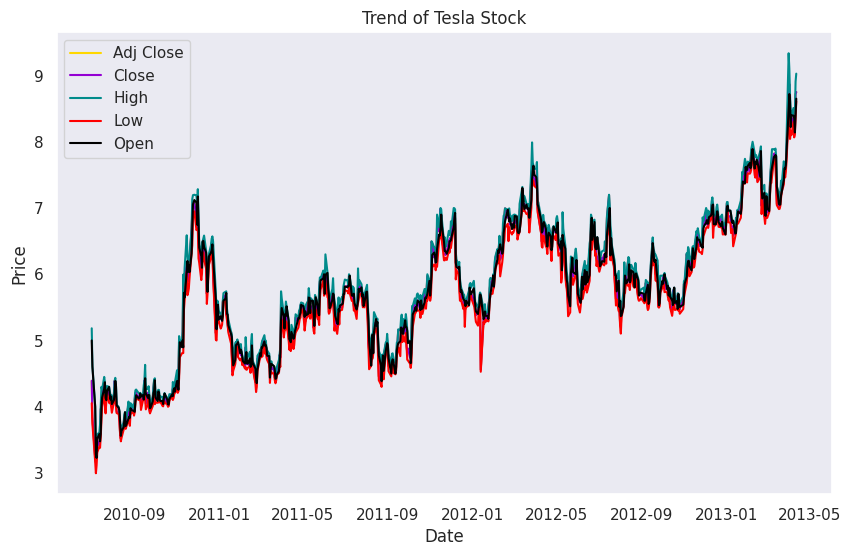

In [431]:
fig, ax = plt.subplots(figsize = (10,6))

plt.plot(df['Date'], df['Adj Close'], color = 'gold', label = 'Adj Close')
plt.plot(df['Date'], df['Close'], color = 'darkviolet', label = 'Close')
plt.plot(df['Date'], df['High'], color = 'darkcyan', label = 'High')
plt.plot(df['Date'], df['Low'], color = 'red', label = 'Low')
plt.plot(df['Date'], df['Open'], color = 'black', label = 'Open')
plt.grid()
plt.legend()
plt.title('Trend of Tesla Stock')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.show()

In [432]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Open'], marker = {'color': 'black'})])
fig.update_layout(
    title={
        'text': "Plot Open Tesla Stock",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [433]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Low'], marker = {'color': 'red'})])
fig.update_layout(
    title={
        'text': "Plot Low Tesla Stock",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [434]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['High'], marker = {'color': 'green'})])
fig.update_layout(
    title={
        'text': "Plot High Tesla Stock",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [435]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Close'], marker = {'color': 'blue'})])
fig.update_layout(
    title={
        'text': "Plot Close Tesla Stock",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [436]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Adj Close'], marker = {'color': 'yellow'})])
fig.update_layout(
    title={
        'text': "Plot Adj Close Tesla Stock",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [437]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Adj Close'], marker = {'color': 'yellow'}, name = 'Adj Close')])
fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], marker = {'color': 'green'}, name = 'High'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], marker = {'color': 'blue'}, name = 'Close'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'], marker = {'color': 'red'}, name = 'Low'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], marker = {'color': 'black'}, name = 'Open'))
fig.update_layout(
    title={
        'text': "Plot Trend Tesla Stock",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

## Request 2:
- Find the Average Daily Trading Volume (ADTV). The ADTV is the average number of shares traded within a day in a given stock. You can find the ADTV by averaging the trading volume over a number of days. Find it for a 5 days average (i.e. ADTV for the fifth row will be the sum of the Volume for the first 5 rows divided by 5). The formula for a 5 days average ADTV is:

$$ADTV = \frac{\sum_{n=0}^{4} (Volume[i-n])}{5}$$

  The above mathematical formula is translated into the following code:

    ADTV[i] = (Volume[i] + Volume[i-1] + Volume[i-2] + Volume[i-3] + Volume[i-4])/5

  Be aware that following this formula, the first 4 rows cannot have an ADTV. Fill their ADTV values with what you think is best.
- Then, once you have the whole ADTV column, convert the column values into integers.
- Additionally, for each ADTV value, compute the ADTV standard deviation for a 5 days window (i.e. the ADTV standard deviation for the fifth row will be compute over the value of the ADTV for the first 5 rows). The formula for a 5 days average ADTV standard deviation is:

$$ADTV\_std = \sqrt{\frac{\sum_{n=0}^{4} (Volume[i-n]-ADTV[i])^2}{5}}$$

  The above mathematical formula is translated into the following code:

    ADTV_std[i] = sqrt((Volume[i]-ADTV[i])**2 + (Volume[i-1]-ADTV[i])**2 + (Volume[i-2]-ADTV[i])**2 +
                  + (Volume[i-3]-ADTV[i])**2 + Volume[i-4]-ADTV[i])**2)/5

- Plot results on a single plot and fill the area between the ADTV and its standard deviation (i.e. ADTV Std) with the fill_between() function.

In [438]:
"""
ADTV = []
for i in range(0,4):
  avg = df['Volume'][i]
  ADTV.append(avg)
print(ADTV)
"""

ADTV = [0 for i in range(0,4)]
ADTV

[0, 0, 0, 0]

In [439]:
for i in range(4, len(df['Volume'])):
    ADTV.append(int((df['Volume'][i] + df['Volume'][i - 1] + df['Volume'][i - 2] + df['Volume'][i - 3] + df['Volume'][i - 4]) / 5))
print(ADTV)

[0, 0, 0, 0, 34858600, 30690400, 27753100, 23566300, 20839800, 16868200, 15438900, 15722900, 14868100, 11925400, 9143400, 7175700, 5611400, 4405800, 3620500, 3278700, 3052000, 2847900, 3458700, 3904500, 4084700, 4399700, 4494300, 4545100, 4429700, 4324500, 4216600, 3889700, 3056300, 2860000, 2748100, 2410100, 3012400, 3237600, 3139600, 2994300, 3077900, 2722600, 2250600, 2242200, 2295500, 2350500, 1861100, 1948400, 1829700, 1729200, 1655400, 2066700, 2462900, 4771200, 5583100, 6169800, 6311100, 6589400, 4573000, 3953400, 3424500, 3843000, 4849400, 6377100, 6395900, 6620900, 5738400, 4082500, 2027700, 1697800, 1225400, 1137400, 1142200, 1296000, 1312900, 1304500, 1305700, 1300000, 1422300, 1298700, 1254400, 1670100, 1714100, 1521200, 1640700, 1978000, 1639600, 1655700, 3305500, 4035900, 4089600, 4723500, 7411400, 7482700, 9200800, 11314200, 11705400, 9394900, 8405700, 6827100, 5733900, 5964100, 6639100, 6033600, 6028700, 6721600, 6443000, 7025000, 7834500, 7963300, 7052000, 6412800, 481

In [440]:
len(ADTV)

700

In [441]:
ADTV_std = []
for i in range(0,4):
  avg_std = ADTV[i]
  ADTV_std.append(avg_std)
print(ADTV_std)

[0, 0, 0, 0]


In [442]:
for i in range(4,len(df['Volume'])):
    std = sqrt(((df['Volume'][i] - ADTV[i]) ** 2 + (df['Volume'][i - 1] - ADTV[i]) ** 2 + (df['Volume'][i - 2] - ADTV[i]) ** 2 + (df['Volume'][i - 3] - ADTV[i]) ** 2 + (df['Volume'][i - 4] - ADTV[i]) ** 2) / 5)
    #print(j)
    ADTV_std.append(int(std))
print(ADTV_std)

[0, 0, 0, 0, 5230561, 6698772, 10426262, 11122685, 9655890, 3949604, 3754355, 3450160, 4335518, 4181771, 3279786, 3263126, 1997424, 1152380, 937354, 739699, 870389, 536489, 1444389, 1371208, 1308797, 938735, 874025, 970935, 995686, 1063045, 1144269, 1355324, 648170, 456589, 354117, 545133, 1330788, 1275046, 1307461, 1365591, 1280470, 682417, 865986, 863566, 865625, 847161, 624562, 520745, 450153, 348243, 278486, 627373, 725591, 4376423, 4145013, 3758138, 3658548, 3476674, 891186, 755503, 927526, 1423315, 2834188, 3571806, 3553627, 3300676, 3870092, 3512894, 942012, 829931, 380984, 315650, 322260, 252956, 258036, 273021, 272660, 266873, 416666, 484171, 534056, 976130, 975246, 978090, 918003, 768569, 388564, 395753, 3046257, 2938443, 2908142, 2631376, 4521713, 4554725, 4920460, 3735585, 3075054, 3766616, 4176772, 3297005, 1379788, 1605637, 1188081, 2264690, 2265319, 3049071, 2992796, 3332502, 2278457, 2171426, 1515361, 2154394, 1815471, 1996682, 1736101, 2621986, 2615474, 2471063, 227307

In [443]:
df['ADTV'] = ADTV
df['ADTV_std'] = ADTV_std
df

,Date,Open,High,Low,Close,Adj Close,Volume,ADTV,ADTV_std
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,0,0
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,0,0
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,0,0
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500,0,0
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000,34858600,5230561
...,...,...,...,...,...,...,...,...,...
695,2013-04-08,8.394,8.510,8.302,8.366,8.366,8395000,17792200,10758828
696,2013-04-09,8.360,8.366,8.066,8.100,8.100,8480500,12835900,7788843
697,2013-04-10,8.140,8.402,8.122,8.372,8.372,10605500,9313400,1389680
698,2013-04-11,8.412,8.910,8.350,8.718,8.718,17237000,10496000,3504404


In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       700 non-null    datetime64[ns]
 1   Open       700 non-null    float64       
 2   High       700 non-null    float64       
 3   Low        700 non-null    float64       
 4   Close      700 non-null    float64       
 5   Adj Close  700 non-null    float64       
 6   Volume     700 non-null    int64         
 7   ADTV       700 non-null    int64         
 8   ADTV_std   700 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 49.3 KB


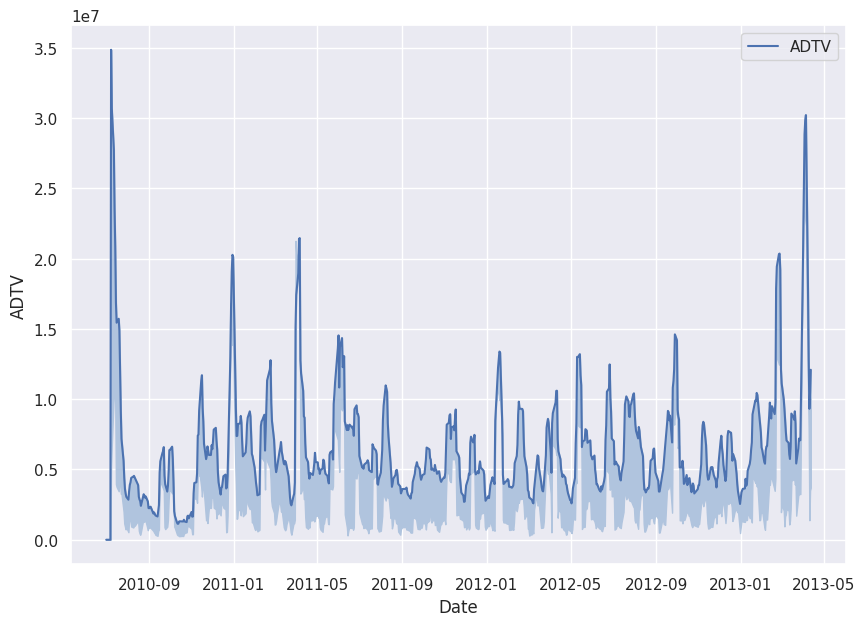

In [445]:
plt.figure(figsize=(10, 7))
#plt.figure().set_figwidth(20)

plt.plot(df['Date'],df['ADTV'], label = 'ADTV')
#.plot(df['Date'], df['ADTV_std'])
plt.fill_between(x=df['Date'], y1=df['ADTV'], y2=df['ADTV_std'],  color = 'lightsteelblue')
plt.legend()
plt.xlabel('Date')
plt.ylabel('ADTV')

plt.show()

## Request 3:
- Inspect how the ADTV and ADTV Std change if gotten from a 2,5,10,20 and 50 days average. Convert the values to int.
- Plot the ADTVs on the same plot. Choose the plot type that you think best represents the data.

In [446]:
#data = pd.DataFrame(df['Date'], df['Volume'])

data = pd.DataFrame(data = df['Date'])
data['Volume'] = df['Volume']
data

,Date,Volume
0,2010-07-01,41094000
1,2010-07-02,25699000
2,2010-07-06,34334500
3,2010-07-07,34608500
4,2010-07-08,38557000
...,...,...
695,2013-04-08,8395000
696,2013-04-09,8480500
697,2013-04-10,10605500
698,2013-04-11,17237000


In [447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    700 non-null    datetime64[ns]
 1   Volume  700 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.1 KB


In [448]:
"""
Questa funzione prende in input la colonna dei Volumi e il numero n di giorni su cui si vuole calcolare la media.
Inizializziamo un lista vuota "media" nella quale inseriamo, nel passaggio successivo, un numero di 0 pari a n-1
in quanto nei primi n-1 giorni non è possibile calcolare la media.
Successivamente calcoliamo la somma degli volumi presi n alla volta, mediante un primo ciclo for, cha va
dall'n-esimo elemento della lista dei Volumi(posizione[n-1]) fino all'ultimo elemento delle lista stessa,
nel quale inizializiamo la somma con il volume in posizione n-1, ed un secondo ciclo for che ci permette appunto
di sommare solo n Volumi consecutivi alla volta. Per ogni indice i, inseriamo nella lista "media" alla posizione i
la media degli volumi dalla posizione i alla i-n.
"""

def Average_Formula(Volume, n):

  media = []

  for k in range(0, n-1):
    media.append(0)

  for i in range(n - 1, len(Volume)):
      somma = Volume[i] #inizializzo la somma con il volumo in posizione n-1

      for j in range(1, n):
        somma = somma + Volume[i - j]

      media.append(int(somma/n))
  return media


In [449]:
def Average_std_Formula(Volume, ADTV, n):

  media_std = []

  for k in range(0, n-1):
    media_std.append(0)

  for i in range(n - 1, len(Volume)):
      somma_std = (Volume[i] - ADTV[i])**2

      for j in range(1, n ):
        somma_std = somma_std + ((Volume[i - j] - ADTV[i])**2)

      media_std.append(int(sqrt((somma_std/n))))
  return media_std


In [450]:
data['ADTV_2_days'] = Average_Formula(data['Volume'], 2)

In [451]:
data['ADTV Std 2_days'] = Average_std_Formula(data['Volume'], data['ADTV_2_days'], 2)

In [452]:
data['ADTV_5_days'] = Average_Formula(data['Volume'], 5)

In [453]:
data['ADTV Std 5_days'] = Average_std_Formula(data['Volume'], data['ADTV_5_days'], 5)

In [454]:
data['ADTV_10_days'] = Average_Formula(data['Volume'], 10)

In [455]:
data['ADTV Std 10_days'] = Average_std_Formula(data['Volume'], data['ADTV_10_days'], 10)

In [456]:
data['ADTV_20_days'] = Average_Formula(data['Volume'], 20)

In [457]:
data['ADTV Std 20_days'] = Average_std_Formula(data['Volume'], data['ADTV_20_days'], 20)

In [458]:
data['ADTV_50_days'] = Average_Formula(data['Volume'], 50)

In [459]:
data['ADTV Std 50_days'] = Average_std_Formula(data['Volume'], data['ADTV_50_days'], 50)

In [460]:
data

,Date,Volume,ADTV_2_days,ADTV Std 2_days,ADTV_5_days,ADTV Std 5_days,ADTV_10_days,ADTV Std 10_days,ADTV_20_days,ADTV Std 20_days,ADTV_50_days,ADTV Std 50_days
0,2010-07-01,41094000,0,0,0,0,0,0,0,0,0,0
1,2010-07-02,25699000,33396500,7697500,0,0,0,0,0,0,0,0
2,2010-07-06,34334500,30016750,4317750,0,0,0,0,0,0,0,0
3,2010-07-07,34608500,34471500,137000,0,0,0,0,0,0,0,0
4,2010-07-08,38557000,36582750,1974250,34858600,5230561,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,2013-04-08,8395000,8078500,316500,17792200,10758828,19266350,19281144,13233500,15132317,11237160,11283713
696,2013-04-09,8480500,8437750,42750,12835900,7788843,18925000,19438217,13262650,15122568,11277990,11269962
697,2013-04-10,10605500,9543000,1062500,9313400,1389680,19081450,19364191,13474150,15054193,11291500,11268743
698,2013-04-11,17237000,13921250,3315750,10496000,3504404,20157000,18928270,14130500,14917155,11493580,11282945


In [461]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              700 non-null    datetime64[ns]
 1   Volume            700 non-null    int64         
 2   ADTV_2_days       700 non-null    int64         
 3   ADTV Std 2_days   700 non-null    int64         
 4   ADTV_5_days       700 non-null    int64         
 5   ADTV Std 5_days   700 non-null    int64         
 6   ADTV_10_days      700 non-null    int64         
 7   ADTV Std 10_days  700 non-null    int64         
 8   ADTV_20_days      700 non-null    int64         
 9   ADTV Std 20_days  700 non-null    int64         
 10  ADTV_50_days      700 non-null    int64         
 11  ADTV Std 50_days  700 non-null    int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 65.8 KB


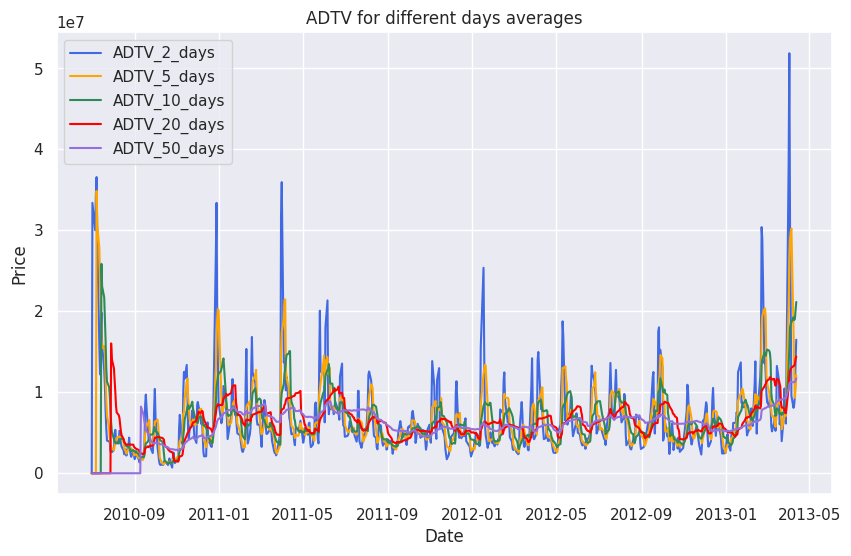

In [462]:
fig, ax = plt.subplots(figsize = (10,6))

plt.plot(data['Date'], data['ADTV_2_days'], color = 'royalblue', label = 'ADTV_2_days')
plt.plot(data['Date'], data['ADTV_5_days'], color = 'orange', label = 'ADTV_5_days')
plt.plot(data['Date'], data['ADTV_10_days'], color = 'seagreen', label = 'ADTV_10_days')
plt.plot(data['Date'], data['ADTV_20_days'], color = 'red', label = 'ADTV_20_days')
plt.plot(data['Date'], data['ADTV_50_days'], color = 'mediumpurple', label = 'ADTV_50_days')

plt.legend()
plt.title('ADTV for different days averages')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.show()


## Request 4:
- Drop any "ADTV" and "ADTV Std" in the original DataFrame.
- Add a column named "ADTV" with the ADTV value for each trading day for the 10 days average ADTV (converted to int) and a column named "ADTV Std" with the value of its standard deviation (converted to int).

In [463]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ADTV,ADTV_std
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,0,0
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,0,0
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,0,0
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500,0,0
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000,34858600,5230561


In [464]:
df.drop(columns=['ADTV', 'ADTV_std'], inplace=True)

In [465]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


In [466]:
df['ADTV'] = data['ADTV_10_days']
df['ADTV_std'] = data['ADTV Std 10_days']

In [467]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ADTV,ADTV_std
695,2013-04-08,8.394,8.510,8.302,8.366,8.366,8395000,19266350,19281144
696,2013-04-09,8.360,8.366,8.066,8.100,8.100,8480500,18925000,19438217
697,2013-04-10,8.140,8.402,8.122,8.372,8.372,10605500,19081450,19364191
698,2013-04-11,8.412,8.910,8.350,8.718,8.718,17237000,20157000,18928270
699,2013-04-12,8.650,9.028,8.610,8.750,8.750,15747000,21152350,18401154


## Request 5:
- Create a directory called 'Output_data' in the directory where this project is.
- Write the complete DataFrame to a .csv file called 'Modified_TSLA.csv'; the file should be saved in the 'Output_data' directory.
- Then check the file content.

In [468]:
import os

In [469]:
if os.path.exists('/content/drive/MyDrive/Output_data') == False:
  os.mkdir('/content/drive/MyDrive/Output_data')

In [470]:
os.chdir('/content/drive/MyDrive/Output_data')

In [471]:
df.to_csv('Modified_TSLA.csv', index = False)

In [472]:
df_TESLA = pd.read_csv('/content/drive/MyDrive/Output_data/Modified_TSLA.csv')

In [473]:
df_TESLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ADTV,ADTV_std
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,0,0
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,0,0
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,0,0
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500,0,0
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000,0,0


In [474]:
df_TESLA.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ADTV,ADTV_std
695,2013-04-08,8.394,8.510,8.302,8.366,8.366,8395000,19266350,19281144
696,2013-04-09,8.360,8.366,8.066,8.100,8.100,8480500,18925000,19438217
697,2013-04-10,8.140,8.402,8.122,8.372,8.372,10605500,19081450,19364191
698,2013-04-11,8.412,8.910,8.350,8.718,8.718,17237000,20157000,18928270
699,2013-04-12,8.650,9.028,8.610,8.750,8.750,15747000,21152350,18401154
